# Jupyter Notebook for Schedule Analysis

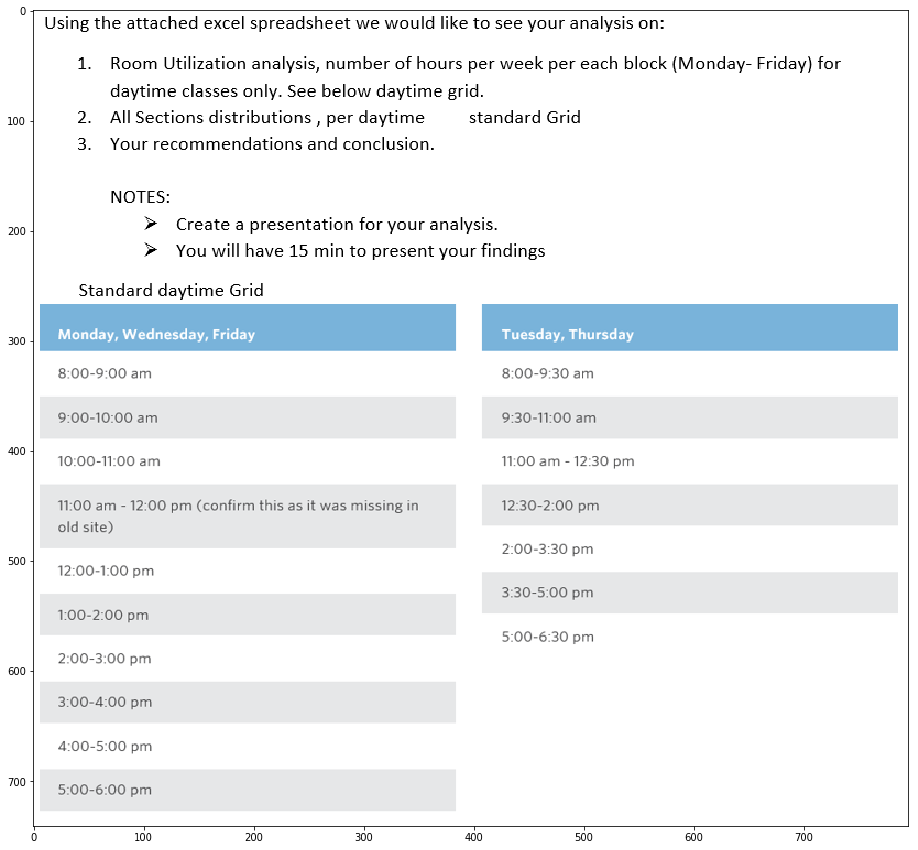

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.rcParams['figure.figsize'] = [17, 15]

image = mpimg.imread("ProposedProblem.png")
plt.imshow(image)
plt.show()

In [43]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

df = pd.read_excel('FinalTestV2.xlsx')

df.columns=['COURSE_CODE', 
            'COURSE_NUMBER', 
            'SECTION_NUMBER', 
            'DAYSMET', 
            'START_TIME', 
            'END_TIME', 
            'START_DATE', 
            'END_DATE', 
            'BUILDING', 
            'ROOM', 
            'CAPACITY']

df.head(10)

,COURSE_CODE,COURSE_NUMBER,SECTION_NUMBER,DAYSMET,START_TIME,END_TIME,START_DATE,END_DATE,BUILDING,ROOM,CAPACITY
0,ANTH,100,D3E,F,1:00 PM,2:00 PM,09/03/2019,11/29/2019,ANSO,203,33.0
1,ANTH,217,001,MWF,1:00 PM,2:00 PM,09/03/2019,11/29/2019,GEOG,200,100.0
2,ANTH,300,200,MW,1:00 PM,2:30 PM,09/03/2019,11/29/2019,SWNG,207,47.0
3,ANTH,500,002,W,1:00 PM,4:00 PM,09/03/2019,11/29/2019,IBLC,156,24.0
4,ANTH,517,001,W,1:00 PM,4:00 PM,09/03/2019,11/29/2019,ANSO,1109,38.0
5,ANTH,540,200,M,1:00 PM,4:00 PM,09/03/2019,11/29/2019,ANSO,205,37.0
6,APBI,244,L05,R,1:00 PM,3:00 PM,09/03/2019,11/29/2019,MCML,102A,30.0
7,APBI,244,L1F,T,1:00 PM,3:00 PM,09/03/2019,11/29/2019,MCML,102A,30.0
8,APBI,260,L01,W,1:00 PM,4:00 PM,09/03/2019,11/29/2019,NaN,NaN,NaN
9,APBI,260,T01,M,1:00 PM,4:00 PM,09/03/2019,11/29/2019,MCML,360D,8.0


In [48]:
df.shape

(4999, 11)

In [49]:
df['COURSE_CODE'].value_counts()

MUSC    313
BIOL    247
CPSC    245
COMM    225
MATH    157
       ... 
LAST      1
BASM      1
RHSC      1
SCAN      1
AANB      1
Name: COURSE_CODE, Length: 176, dtype: int64

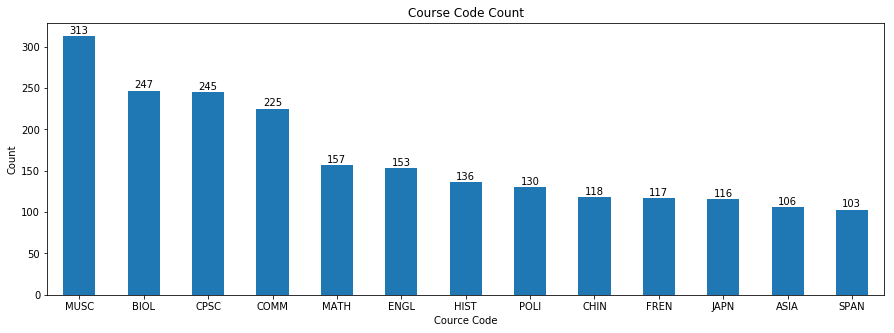

In [96]:
plt.rcParams['figure.figsize'] = [15, 5]

n = [-0.15,0.85,1.85,2.85,3.85,4.85,5.85,6.85,7.85,8.85,9.85,10.85,11.85]

ccode = df['COURSE_CODE'].value_counts()
threshold = 100
mask = ccode > threshold
ccode = ccode.loc[mask]
ax=ccode.plot(kind='bar')
plt.xticks(rotation=0)

for i in range(len(ccode)):
    plt.annotate(str(ccode[i]), xy=(n[i],ccode[i]+3))

ax.set_title('Course Code Count')
ax.set_xlabel('Cource Code')
ax.set_ylabel('Count')  
    
plt.show()

In [50]:
df['DAYSMET'].value_counts()

W       815
F       805
MWF     677
R       582
TR      564
T       551
M       545
MW      271
MTRF     50
WF       44
TF       35
MF       31
TW       10
S         8
MTWR      4
MT        3
MR        3
MWR       1
Name: DAYSMET, dtype: int64

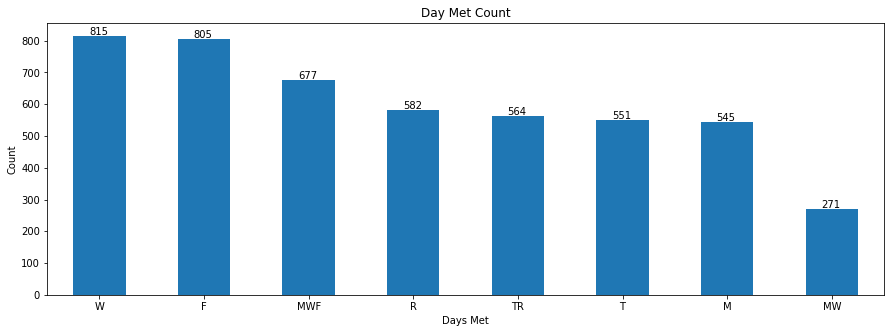

In [106]:
plt.rcParams['figure.figsize'] = [15, 5]

n = [-0.1,0.9,1.9,2.9,3.9,4.9,5.9,6.9]

dmet = df['DAYSMET'].value_counts()
threshold = 100
mask = dmet > threshold
dmet = dmet.loc[mask]
ax=dmet.plot(kind='bar')
plt.xticks(rotation=0)

for i in range(len(dmet)):
    plt.annotate(str(dmet[i]), xy=(n[i],dmet[i]+3))

ax.set_title('Day Met Count')
ax.set_xlabel('Days Met')
ax.set_ylabel('Count')  
    
plt.show()

In [176]:
df1 = df.loc[:,['DAYSMET', 'START_TIME', 'END_TIME', 'BUILDING', 'ROOM']]

df1.head(10)

,DAYSMET,START_TIME,END_TIME,BUILDING,ROOM
0,F,1:00 PM,2:00 PM,ANSO,203
1,MWF,1:00 PM,2:00 PM,GEOG,200
2,MW,1:00 PM,2:30 PM,SWNG,207
3,W,1:00 PM,4:00 PM,IBLC,156
4,W,1:00 PM,4:00 PM,ANSO,1109
5,M,1:00 PM,4:00 PM,ANSO,205
6,R,1:00 PM,3:00 PM,MCML,102A
7,T,1:00 PM,3:00 PM,MCML,102A
8,W,1:00 PM,4:00 PM,NaN,NaN
9,M,1:00 PM,4:00 PM,MCML,360D


In [177]:
STime = pd.to_datetime(df1['START_TIME'],format= '%I:%M %p')
ETime = pd.to_datetime(df1['END_TIME'],format= '%I:%M %p' )

df1['HOURS'] = ETime - STime   

In [179]:
df1.head(10)

,DAYSMET,START_TIME,END_TIME,BUILDING,ROOM,HOURS
0,F,1:00 PM,2:00 PM,ANSO,203,01:00:00
1,MWF,1:00 PM,2:00 PM,GEOG,200,01:00:00
2,MW,1:00 PM,2:30 PM,SWNG,207,01:30:00
3,W,1:00 PM,4:00 PM,IBLC,156,03:00:00
4,W,1:00 PM,4:00 PM,ANSO,1109,03:00:00
5,M,1:00 PM,4:00 PM,ANSO,205,03:00:00
6,R,1:00 PM,3:00 PM,MCML,102A,02:00:00
7,T,1:00 PM,3:00 PM,MCML,102A,02:00:00
8,W,1:00 PM,4:00 PM,NaN,NaN,03:00:00
9,M,1:00 PM,4:00 PM,MCML,360D,03:00:00


# Rooms Utilization

In [243]:
rUtil = df1.loc[:,['BUILDING','ROOM','DAYSMET','HOURS']].groupby(['BUILDING','ROOM','DAYSMET']).sum()
rUtil.head(50)

HOURS
BUILDING ROOM DAYSMET         
AAC      1002 M       03:00:00
              R       03:00:00
              W       03:00:00
         3007 W       03:00:00
ACEN     105  M       03:00:00
              TR      06:00:00
              WF      04:00:00
ACU      G221 M       03:30:00
              R       02:00:00
              T       03:00:00
         G226 M       04:00:00
              W       03:00:00
         T182 M       03:00:00
              W       03:00:00
         T185 M       03:00:00
              W       03:00:00
         T206 R       03:00:00
              T       03:00:00
              W       03:00:00
AERL     107  F       01:00:00
              W       02:00:00
         120  MWF     04:00:00
              TR      03:00:00
              W       01:00:00
         320  F       02:00:00
              TR      01:30:00
ALRD     104  MW      04:00:00
              TR      05:00:00
              WF      04:00:00
         105  MW      05:30:00
              TR      07:00:00
              WF      04:00:00
         106  F       04:00:00
              MW      01:30:00
         111  M       03:00:00
              TR      02:00:00
              W       03:00:00
         112  F       02:00:00
              R       03:00:00
              T       03:00:00
              W       03:00:00
         113  M       03:00:00
              R       03:00:00
              W       03:00:00
         115  TR      03:00:00
         121  F       04:00:00
              M       06:00:00
              MW      01:30:00
              TR      03:00:00
         122  F       04:00:00

In [199]:
rUtil.tail(50)

HOURS
BUILDING ROOM DAYSMET         
WESB     201  F       03:00:00
              M       04:00:00
              MWF     01:00:00
              R       01:00:00
              TR      02:30:00
              W       03:00:00
WMAX     140  R       01:30:00
         240  R       03:00:00
              W       03:00:00
WOOD     1    F       02:00:00
              MWF     03:00:00
              R       03:00:00
              T       04:30:00
              W       02:00:00
         2    F       01:00:00
              MWF     04:00:00
              R       01:30:00
              T       01:30:00
              TR      04:30:00
              W       01:00:00
         3    F       02:30:00
              R       03:00:00
              T       04:00:00
              TR      01:30:00
              W       01:00:00
         4    M       03:00:00
              MW      01:00:00
              MWF     03:00:00
              R       02:00:00
              T       01:30:00
              WF      02:00:00
         5    F       04:00:00
              T       04:00:00
              W       03:00:00
         6    MWF     04:00:00
              T       01:30:00
              TR      03:00:00
         B75  MWF     01:00:00
              R       02:00:00
              T       01:00:00
              W       02:00:00
         B79  TR      01:00:00
              W       03:00:00
         G41  F       05:00:00
              R       01:30:00
              W       08:00:00
         G57  R       02:00:00
         G59  R       02:00:00
         G66  R       02:00:00
              W       01:00:00

In [244]:
rUtil['HOURS'] = rUtil['HOURS'].astype(str).str.extract('days (.*?)\.')

rUtil.to_excel(r'RoomUtilization.xlsx', index = True)

In [245]:
df.head(10)

,COURSE_CODE,COURSE_NUMBER,SECTION_NUMBER,DAYSMET,START_TIME,END_TIME,START_DATE,END_DATE,BUILDING,ROOM,CAPACITY
0,ANTH,100,D3E,F,1:00 PM,2:00 PM,09/03/2019,11/29/2019,ANSO,203,33.0
1,ANTH,217,001,MWF,1:00 PM,2:00 PM,09/03/2019,11/29/2019,GEOG,200,100.0
2,ANTH,300,200,MW,1:00 PM,2:30 PM,09/03/2019,11/29/2019,SWNG,207,47.0
3,ANTH,500,002,W,1:00 PM,4:00 PM,09/03/2019,11/29/2019,IBLC,156,24.0
4,ANTH,517,001,W,1:00 PM,4:00 PM,09/03/2019,11/29/2019,ANSO,1109,38.0
5,ANTH,540,200,M,1:00 PM,4:00 PM,09/03/2019,11/29/2019,ANSO,205,37.0
6,APBI,244,L05,R,1:00 PM,3:00 PM,09/03/2019,11/29/2019,MCML,102A,30.0
7,APBI,244,L1F,T,1:00 PM,3:00 PM,09/03/2019,11/29/2019,MCML,102A,30.0
8,APBI,260,L01,W,1:00 PM,4:00 PM,09/03/2019,11/29/2019,NaN,NaN,NaN
9,APBI,260,T01,M,1:00 PM,4:00 PM,09/03/2019,11/29/2019,MCML,360D,8.0


In [246]:
df2 = df.loc[:,['SECTION_NUMBER', 'DAYSMET', 'START_TIME', 'END_TIME']]

df2.head(10)

,SECTION_NUMBER,DAYSMET,START_TIME,END_TIME
0,D3E,F,1:00 PM,2:00 PM
1,001,MWF,1:00 PM,2:00 PM
2,200,MW,1:00 PM,2:30 PM
3,002,W,1:00 PM,4:00 PM
4,001,W,1:00 PM,4:00 PM
5,200,M,1:00 PM,4:00 PM
6,L05,R,1:00 PM,3:00 PM
7,L1F,T,1:00 PM,3:00 PM
8,L01,W,1:00 PM,4:00 PM
9,T01,M,1:00 PM,4:00 PM


# Sections Distributions

In [259]:
sDist = df2.groupby(['DAYSMET', 'START_TIME', 'END_TIME']).agg({'SECTION_NUMBER': ','.join})

sDist.head(50)

SECTION_NUMBER
DAYSMET START_TIME END_TIME                                                   
F       10:00 AM   11:00 AM  D3B,D3J,D3M,VT1,D1B,D1B,002,001,L02,T45,T46,T0...
                   11:30 AM                                001,104,121,111,101
                   12:00 PM  L1R,L1L,MUC,MUC,MUC,MUC,MC1,MC1,L1A,L1B,T1A,T1...
                   12:30 PM                                            101,S11
                   1:00 PM                                     325,L1B,001,001
                   5:00 PM                                                 001
        10:30 AM   12:30 PM                        114,120,001,002,003,004,001
        11:00 AM   12:00 PM  D3C,D3L,D3N,D1C,D1C,001,001,T1F,107,T47,T48,T0...
                   12:30 PM                                    L1A,302,L02,L01
                   1:00 PM     T15,L07,101,L1K,L1S,L1B,L1L,101,T10,001,001,L01
        11:30 AM   1:00 PM                                     101,122,104,112
                   1:30 PM                                                 L1A
                   2:30 PM                                                 001
        12:00 PM   1:00 PM   D3D,D3I,VT2,D1G,001,T51,101,1W1,101,V01,004,00...
                   1:30 PM                                         101,L1A,L1B
                   2:00 PM                             L1J,L1Q,T17,L1C,L1E,001
                   3:00 PM                                 002,L1P,L1B,T1A,T1A
                   5:00 PM                                                 001
        12:30 PM   1:30 PM                                                 NMO
                   2:00 PM                                             L01,001
                   3:00 PM                                                 001
                   4:30 PM                                                 003
        1:00 PM    2:00 PM   D3E,001,VT1,D1D,D1E,T19,101,1W1,101,V02,003,00...
                   2:30 PM                         001,101,001,101,123,101,L03
                   3:00 PM   101,L1C,L1D,T1C,T1D,L01,101,L1B,L1G,L1T,L1C,T1...
                   3:30 PM                                             001,S12
                   4:00 PM   PR2,L07,L04,101,001,301,301,090,001,WL1,001,00...
                   4:30 PM                                             001,001
                   5:00 PM                                             102,005
                   6:30 PM                                                 004
        1:30 PM    3:00 PM                                 L1A,001,001,101,101
                   3:30 PM                                 001,002,003,001,004
                   4:30 PM                                         001,004,101
        2:00 PM    2:30 PM                                                 101
                   3:00 PM   D3F,D3K,D1E,D1D,001,001,002,T01,T02,006,T1A,00...
                   3:30 PM                                 END,107,102,W1M,001
                   4:00 PM   L1O,MUC,MUC,MUC,MC1,MUC,L08,T1A,001,L1A,101,00...
                   5:00 PM   L04,L17,L18,L19,L20,L21,L22,L23,L24,101,L02,L0...
                   6:00 PM                                                 OR1
        2:30 PM    4:00 PM                                                 311
                   4:30 PM                                         T0A,T0A,L1F
                   5:00 PM                                                 IGP
        3:00 PM    4:00 PM   D3G,D1F,001,T02,T01,T1A,008,101,T1E,T1V,T1A,FM...
                   4:30 PM                                             101,001
                   5:00 PM   T52,L1I,L1C,L1F,L1H,L1N,003,001,101,101,001,L0...
                   6:00 PM                         001,W01,001,L17,L1Q,320,L1C
M       10:00 AM   11:00 AM  002,001,107,T10,T01,T02,001,001,101,T03,T1Z,T1...
                   11:30 AM                                104,102,101,101,001
                   12:00 PM  L1N,L1A,00A,L1A,T1A,00D,105,107,V01,001,104,10...
                   1:00 PM         

In [260]:
sDist.to_excel(r'SectionsDistributions.xlsx', index = True)

## Recommendations:

Planning and scheduling resources for higher education require a high level of effort to satisfy academic, financial and logistical requirements. At the beginning of each semester, colleges and administrators must deal with several challenges, such as complaints from students and professors.

Several constraints need to be met, such as:

- Classes taught by the same Professor.
- Classes held in the same room.
- A class and a recitation or a lab in the same class.
- Space or room constraints. The number of students enrolled in a class and particular types of laboratories require specific types of rooms.
- Time conflicts for classes with students in common.
- A balanced spread schedule over the week.
- Contiguous time slots.
- Balance enrollment in multi-section classes.
- Lunch and break times.
- Professors’ timing requirements.
- The distance between a room and the building housing the department.

My recommendation is that university administrators seek the use of resources effectively and efficiently. It is essential to accurately classify the severity of the constraints involved in the university schedule to satisfy each of these constraints. I still need to know more about the resources of this university; however, it is apparently possible to increase the use of some rooms.

I still need to better understand how the sections are used when scheduling classes. Nevertheless, based on the distribution presented previously, most of the standard grid has a considerable number of sections.

### Conclusions:

My conclusions regarding this small sample of the work are that we can use programming tools, such as Python or R, and data visualization tools, such as Tableau, to find results that meet all the constraints involved in the university's scheduling problem. I look forward to learning more about the problem and contributing to the academic community at this university.